In [1]:
from fastai.vision import *
from fastai.vision.all import *
import fastai
print(fastai.__version__)

import json
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30,20)

2.7.13


# Read and Prep Data

In [2]:
# read building locations for training
fname = 'airport'
dir = './data_for_dem/'
path = Path(dir)
fname_coco = dir+fname+'_coco.json'
annots = json.load(open(fname_coco))

FileNotFoundError: [Errno 2] No such file or directory: './data_for_dem/airport_coco.json'

In [ ]:
annots.keys()

dict_keys(['images', 'annotations', 'categories'])

In [ ]:
annots['annotations'][0]

NameError: name 'annots' is not defined

In [ ]:
# print the categories
annots['categories']

[{'id': 0, 'name': 'building', 'supercategory': 'building'},
 {'id': 1, 'name': 'car', 'supercategory': 'car'}]

In [ ]:
# setting up training and validation data (for now, use the same data)
train_images, train_lbl_bbox = get_annotations(fname_coco)
val_images, val_lbl_bbox = get_annotations(fname_coco)

In [ ]:
train_images[0], train_lbl_bbox[0]

('./data_for_dem/airport.png',
 ([[970.0, 113.0, 990.0, 131.0],
   [1765.0, 1176.0, 1775.0, 1192.0],
   [1189.0, 1604.0, 1227.0, 1654.0],
   [1093.0, 1600.0, 1141.0, 1641.0],
   [1185.0, 1683.0, 1237.0, 1713.0],
   [981.0, 1595.0, 1039.0, 1636.0],
   [1024.0, 1665.0, 1080.0, 1710.0],
   [991.0, 1663.0, 1014.0, 1701.0],
   [868.0, 1578.0, 896.0, 1601.0],
   [785.0, 1316.0, 806.0, 1347.0],
   [837.0, 1409.0, 861.0, 1434.0],
   [534.0, 1377.0, 555.0, 1408.0],
   [671.0, 1438.0, 692.0, 1469.0],
   [718.0, 1212.0, 739.0, 1243.0],
   [850.0, 1212.0, 871.0, 1243.0],
   [861.0, 1243.0, 882.0, 1274.0],
   [850.0, 1305.0, 871.0, 1337.0],
   [554.0, 1256.0, 578.0, 1280.0],
   [700.0, 1312.0, 721.0, 1343.0],
   [566.0, 1324.0, 587.0, 1355.0],
   [820.0, 741.0, 921.0, 823.0],
   [1109.0, 859.0, 1164.0, 932.0],
   [1253.0, 901.0, 1495.0, 1061.0],
   [915.0, 1754.0, 1027.0, 1840.0],
   [697.0, 1812.0, 764.0, 1887.0],
   [419.0, 1695.0, 499.0, 1725.0],
   [468.0, 1119.0, 496.0, 1141.0],
   [498.0, 111

In [ ]:
# working from https://docs.fast.ai/vision.augment.html#integration-tests
images, lbl_bbox = get_annotations(fname_coco)
idx=0
coco_fn,bbox = images[idx],lbl_bbox[idx]

def _coco_bb(x):  return TensorBBox.create(bbox[0])
def _coco_lbl(x): return bbox[1]

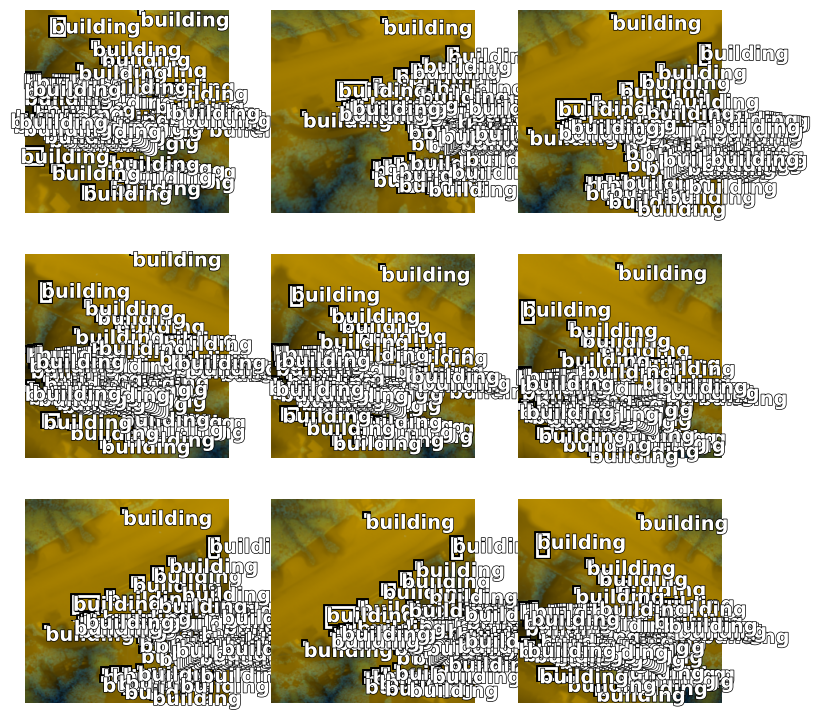

In [ ]:
coco_dsrc = Datasets([coco_fn]*10, [PILImage.create, [_coco_bb], [_coco_lbl, MultiCategorize(add_na=True)]], n_inp=1)
coco_tdl = TfmdDL(coco_dsrc, bs=9, after_item=[BBoxLabeler(), PointScaler(), ToTensor(), Resize(256)],
                  after_batch=[IntToFloatTensor(), *aug_transforms()])

coco_tdl.show_batch(max_n=9)

In [ ]:
imgs = images

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
imgs[0], lbl_bbox[0]

('./data_for_dem/airport.png',
 ([[970.0, 113.0, 990.0, 131.0],
   [1765.0, 1176.0, 1775.0, 1192.0],
   [1189.0, 1604.0, 1227.0, 1654.0],
   [1093.0, 1600.0, 1141.0, 1641.0],
   [1185.0, 1683.0, 1237.0, 1713.0],
   [981.0, 1595.0, 1039.0, 1636.0],
   [1024.0, 1665.0, 1080.0, 1710.0],
   [991.0, 1663.0, 1014.0, 1701.0],
   [868.0, 1578.0, 896.0, 1601.0],
   [785.0, 1316.0, 806.0, 1347.0],
   [837.0, 1409.0, 861.0, 1434.0],
   [534.0, 1377.0, 555.0, 1408.0],
   [671.0, 1438.0, 692.0, 1469.0],
   [718.0, 1212.0, 739.0, 1243.0],
   [850.0, 1212.0, 871.0, 1243.0],
   [861.0, 1243.0, 882.0, 1274.0],
   [850.0, 1305.0, 871.0, 1337.0],
   [554.0, 1256.0, 578.0, 1280.0],
   [700.0, 1312.0, 721.0, 1343.0],
   [566.0, 1324.0, 587.0, 1355.0],
   [820.0, 741.0, 921.0, 823.0],
   [1109.0, 859.0, 1164.0, 932.0],
   [1253.0, 901.0, 1495.0, 1061.0],
   [915.0, 1754.0, 1027.0, 1840.0],
   [697.0, 1812.0, 764.0, 1887.0],
   [419.0, 1695.0, 499.0, 1725.0],
   [468.0, 1119.0, 496.0, 1141.0],
   [498.0, 111

In [ ]:
img2bbox = dict(zip(imgs, lbl_bbox))

In [ ]:
first = {k: img2bbox[k] for k in list(img2bbox)[:1]}; first

{'./data_for_dem/airport.png': ([[970.0, 113.0, 990.0, 131.0],
   [1765.0, 1176.0, 1775.0, 1192.0],
   [1189.0, 1604.0, 1227.0, 1654.0],
   [1093.0, 1600.0, 1141.0, 1641.0],
   [1185.0, 1683.0, 1237.0, 1713.0],
   [981.0, 1595.0, 1039.0, 1636.0],
   [1024.0, 1665.0, 1080.0, 1710.0],
   [991.0, 1663.0, 1014.0, 1701.0],
   [868.0, 1578.0, 896.0, 1601.0],
   [785.0, 1316.0, 806.0, 1347.0],
   [837.0, 1409.0, 861.0, 1434.0],
   [534.0, 1377.0, 555.0, 1408.0],
   [671.0, 1438.0, 692.0, 1469.0],
   [718.0, 1212.0, 739.0, 1243.0],
   [850.0, 1212.0, 871.0, 1243.0],
   [861.0, 1243.0, 882.0, 1274.0],
   [850.0, 1305.0, 871.0, 1337.0],
   [554.0, 1256.0, 578.0, 1280.0],
   [700.0, 1312.0, 721.0, 1343.0],
   [566.0, 1324.0, 587.0, 1355.0],
   [820.0, 741.0, 921.0, 823.0],
   [1109.0, 859.0, 1164.0, 932.0],
   [1253.0, 901.0, 1495.0, 1061.0],
   [915.0, 1754.0, 1027.0, 1840.0],
   [697.0, 1812.0, 764.0, 1887.0],
   [419.0, 1695.0, 499.0, 1725.0],
   [468.0, 1119.0, 496.0, 1141.0],
   [498.0, 1114

In [ ]:
getters = [lambda o: o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]

In [ ]:
item_tfms = [Resize(224, method='squish'),]
batch_tfms = [Rotate(), Flip(), Dihedral()]

In [ ]:
ldr_datablock = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 splitter=RandomSplitter(),
                 getters=getters,
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms,
                 n_inp=1)

In [ ]:
dls = ldr_datablock.dataloaders(imgs, bs = 1)

In [ ]:
b = dls.create_batch(imgs)

In [ ]:
dls.vocab

['#na#', 'building']

In [ ]:
len(dls.vocab)

2

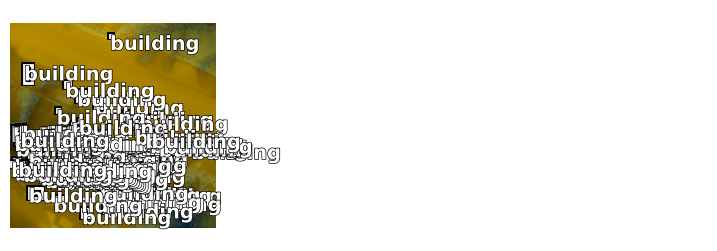

In [ ]:
matplotlib.rcParams['figure.figsize'] = (30,20)
dls.show_batch(nrows=1, ncols=3)

In [ ]:
one_batch = dls.one_batch()

In [ ]:
one_batch[1][0][0]

TensorBBox([-0.0295,  0.8689, -0.0095,  0.8869], device='cuda:0')

In [ ]:
# Zero Padding
one_batch[2]

TensorMultiCategory([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
                    device='cuda:0')

# Object Detector

In [ ]:
def flatten_conv(x,k):
    # Flatten the 4x4 grid to dim16 vectors
    bs,nf,gx,gy = x.size()
    x = x.permute(0,2,3,1).contiguous()
    return x.view(bs,-1,nf//k)

In [ ]:
class OutConv(nn.Module):
    # Output Layers for SSD-Head. Contains oconv1 for Classification and oconv2 for Detection
    def __init__(self, k, nin, bias):
        super().__init__()
        self.k = k
        self.oconv1 = nn.Conv2d(nin, (len(dls.vocab))*k, 3, padding=1)
        self.oconv2 = nn.Conv2d(nin, 4*k, 3, padding=1)
        self.oconv1.bias.data.zero_().add_(bias)
        
    def forward(self, x):
        return [flatten_conv(self.oconv1(x), self.k),
                flatten_conv(self.oconv2(x), self.k)]

In [ ]:
class StdConv(nn.Module):
    # Standard Convolutional layers 
    def __init__(self, nin, nout, stride=2, drop=0.1):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 3, stride=stride, padding=1)
        self.bn = nn.BatchNorm2d(nout)
        self.drop = nn.Dropout(drop)
        
    def forward(self, x): return self.drop(self.bn(F.relu(self.conv(x))))

In [ ]:
class SSD_Head(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(0.25)
        self.sconv0 = StdConv(512,256, stride=1)
        self.sconv2 = StdConv(256,256)
        self.out = OutConv(k, 256, bias)
        
    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
        x = self.sconv2(x)
        return self.out(x)

In [ ]:
k=1
head_reg4 = SSD_Head(k, -3.)
body = create_body(resnet34(True))
model = nn.Sequential(body, head_reg4)


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
out0 = body(one_batch[0].cpu())

In [ ]:
out1 = head_reg4(out0)

In [ ]:
out1[0].shape, out1[1].shape

(torch.Size([1, 16, 2]), torch.Size([1, 16, 4]))

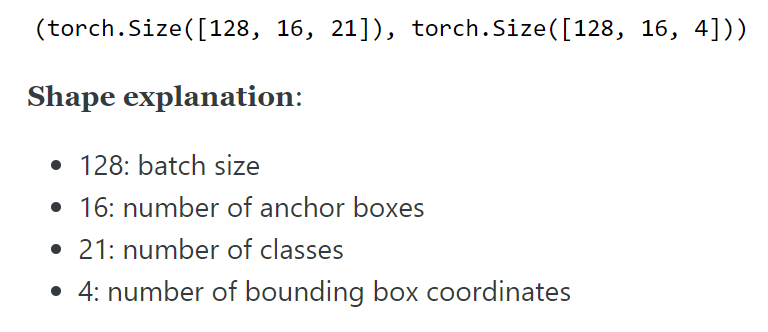

In [ ]:
anc_grid = 4 # Start with only 4x4 grid and no variation for each cell
k = 1 # Variation of each anchor box
anc_offset = 1/(anc_grid*2)
anc_x = np.repeat(np.linspace(anc_offset, 1-anc_offset, anc_grid), anc_grid) # Center of anc in x
anc_y = np.tile(np.linspace(anc_offset, 1-anc_offset, anc_grid), anc_grid) # Center f anc in y

In [ ]:
anc_x

array([0.125, 0.125, 0.125, 0.125, 0.375, 0.375, 0.375, 0.375, 0.625,
       0.625, 0.625, 0.625, 0.875, 0.875, 0.875, 0.875])

In [ ]:
anc_y

array([0.125, 0.375, 0.625, 0.875, 0.125, 0.375, 0.625, 0.875, 0.125,
       0.375, 0.625, 0.875, 0.125, 0.375, 0.625, 0.875])

In [ ]:
anc_ctrs = np.tile(np.stack([anc_x,anc_y], axis=1), (k,1)) # Anchor centers
anc_sizes = np.array([[1/anc_grid,1/anc_grid] for i in range(anc_grid*anc_grid)])

In [ ]:
anc_ctrs

array([[0.125, 0.125],
       [0.125, 0.375],
       [0.125, 0.625],
       [0.125, 0.875],
       [0.375, 0.125],
       [0.375, 0.375],
       [0.375, 0.625],
       [0.375, 0.875],
       [0.625, 0.125],
       [0.625, 0.375],
       [0.625, 0.625],
       [0.625, 0.875],
       [0.875, 0.125],
       [0.875, 0.375],
       [0.875, 0.625],
       [0.875, 0.875]])

In [ ]:
anc_sizes

array([[0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25],
       [0.25, 0.25]])

In [ ]:
anchors = torch.tensor(np.concatenate([anc_ctrs, anc_sizes], axis=1), requires_grad=False).cuda()
# Coordinates with format: center_x, center_y, W, H

In [ ]:
anchors

tensor([[0.1250, 0.1250, 0.2500, 0.2500],
        [0.1250, 0.3750, 0.2500, 0.2500],
        [0.1250, 0.6250, 0.2500, 0.2500],
        [0.1250, 0.8750, 0.2500, 0.2500],
        [0.3750, 0.1250, 0.2500, 0.2500],
        [0.3750, 0.3750, 0.2500, 0.2500],
        [0.3750, 0.6250, 0.2500, 0.2500],
        [0.3750, 0.8750, 0.2500, 0.2500],
        [0.6250, 0.1250, 0.2500, 0.2500],
        [0.6250, 0.3750, 0.2500, 0.2500],
        [0.6250, 0.6250, 0.2500, 0.2500],
        [0.6250, 0.8750, 0.2500, 0.2500],
        [0.8750, 0.1250, 0.2500, 0.2500],
        [0.8750, 0.3750, 0.2500, 0.2500],
        [0.8750, 0.6250, 0.2500, 0.2500],
        [0.8750, 0.8750, 0.2500, 0.2500]], device='cuda:0',
       dtype=torch.float64)

In [ ]:
grid_sizes = torch.tensor(np.array([1/anc_grid]), requires_grad=False).unsqueeze(1).cuda()

In [ ]:
grid_sizes

tensor([[0.2500]], device='cuda:0', dtype=torch.float64)

## Visualization Utils

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cmx
from matplotlib import patches, patheffects

In [ ]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.set_xticks(np.linspace(0, 224, 8))
    ax.set_yticks(np.linspace(0, 224, 8))
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    return ax

In [ ]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [ ]:
def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [ ]:
def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

In [ ]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [ ]:
def get_cmap(N):
    color_norm  = mcolors.Normalize(vmin=0, vmax=N-1)
    return cmx.ScalarMappable(norm=color_norm, cmap='Set3').to_rgba

In [ ]:
num_colr = 12
cmap = get_cmap(num_colr)
colr_list = [cmap(float(x)) for x in range(num_colr)]

In [ ]:
num_colr = 12
cmap = get_cmap(num_colr)
colr_list = [cmap(float(x)) for x in range(num_colr)]

In [ ]:
def show_ground_truth(ax, im, bbox, clas=None, prs=None, thresh=0.3):
    bb = [bb_hw(o) for o in bbox.reshape(-1,4)]
    if prs is None:  prs  = [None]*len(bb)
    if clas is None: clas = [None]*len(bb)
    ax = show_img(im, ax=ax)
    k=0
    for i,(b,c,pr) in enumerate(zip(bb, clas, prs)):
        if((b[2]>1) and (pr is None or pr > thresh)):
            k+=1
            draw_rect(ax, b, color=colr_list[i%num_colr])
            txt = f'{k}: '
            if c is not None: txt += ('bg' if c==0 else dls.vocab[c])
            if pr is not None: txt += f' {pr:.2f}'
            draw_text(ax, b[:2], txt, color=colr_list[i%num_colr])

In [ ]:
def torch_gt(ax, ima, bbox, clas, prs=None, thresh=0.4):
    return show_ground_truth(ax, ima, to_np((bbox*224).long()),
         to_np(clas), to_np(prs) if prs is not None else None, thresh)

# Showing one batch

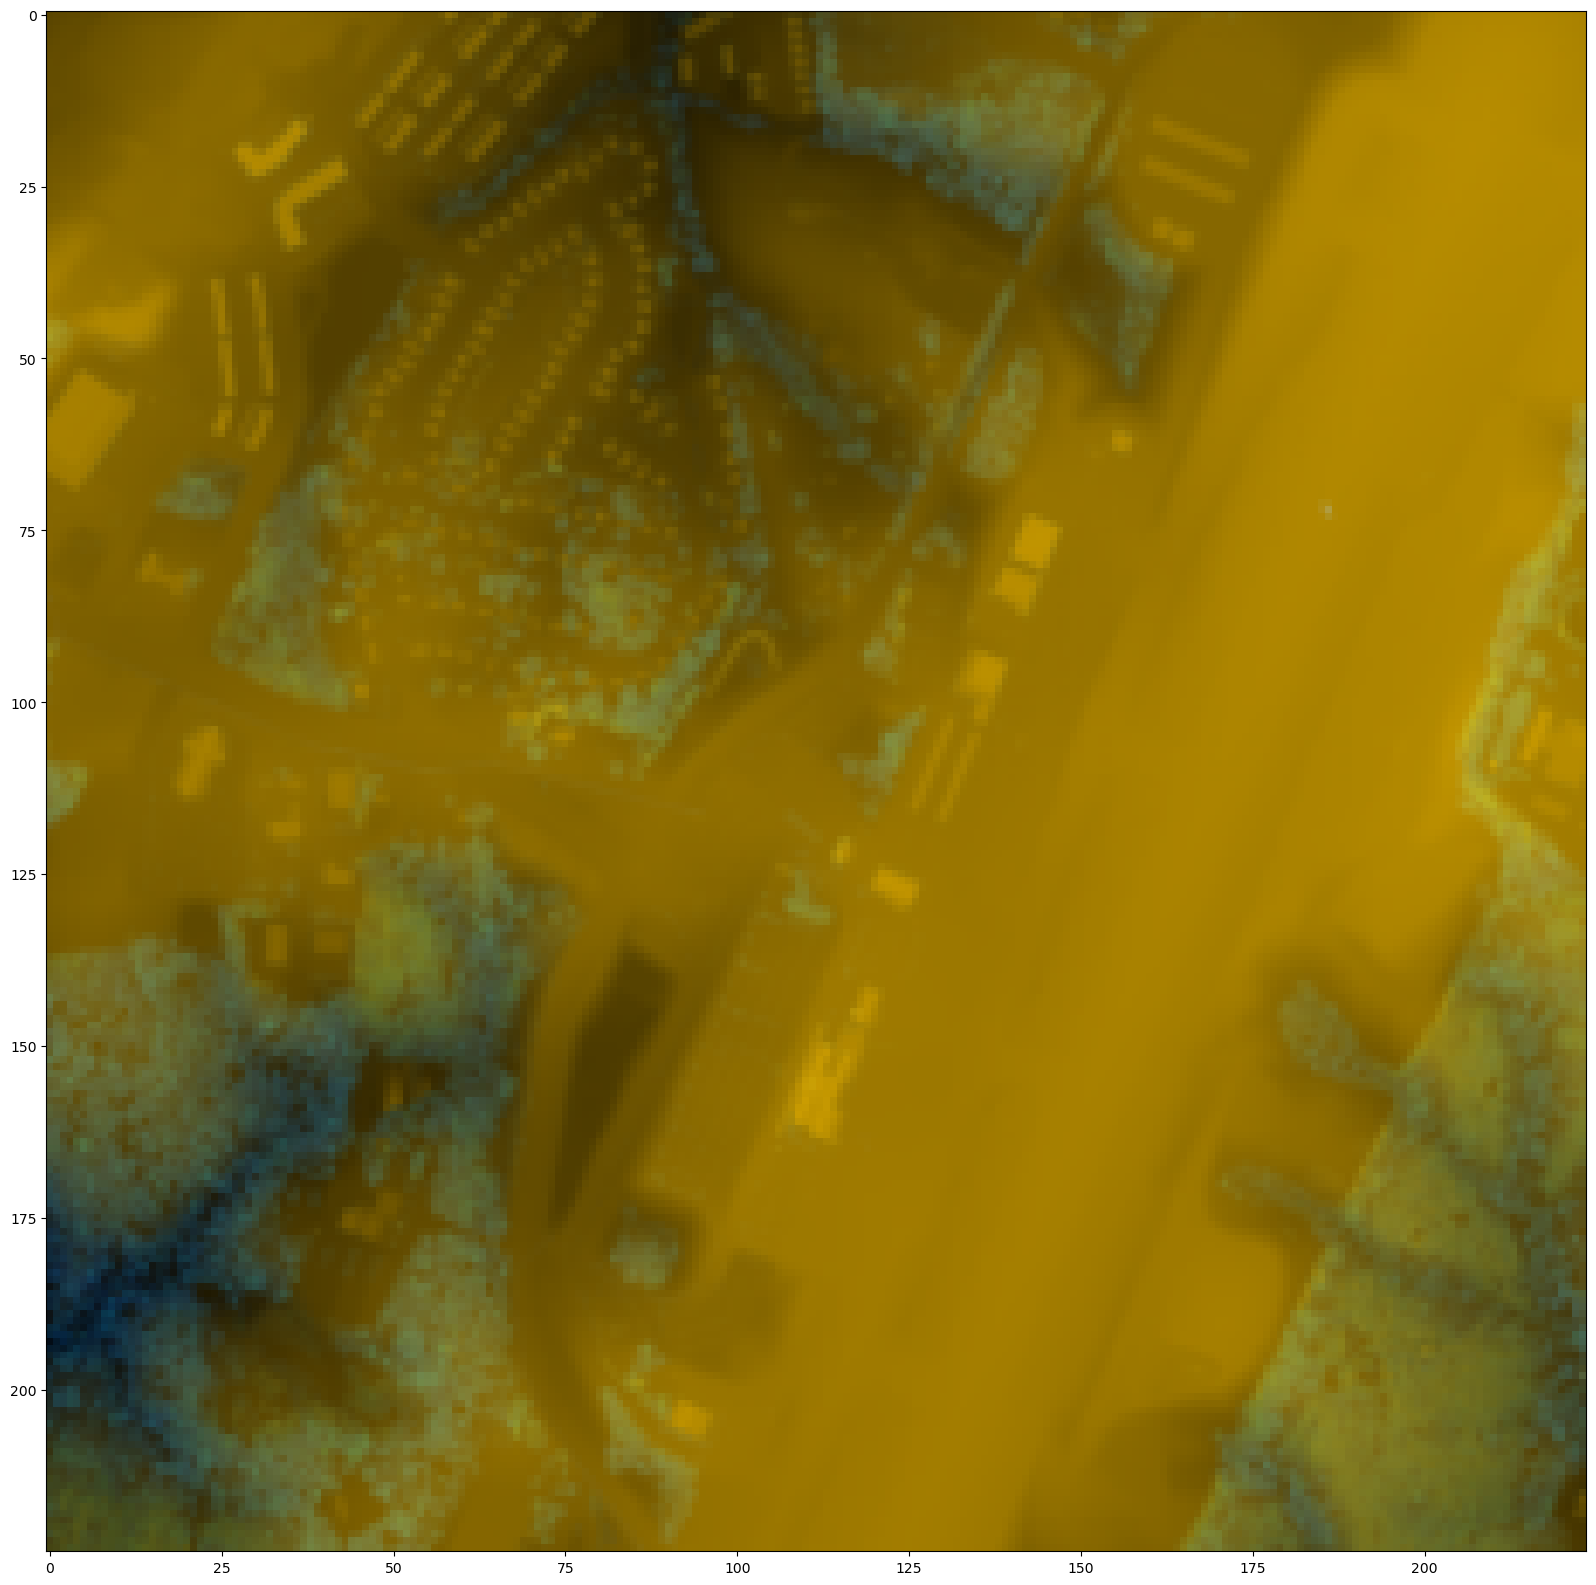

In [ ]:
idx = 0
img = one_batch[0][idx].permute(2,1,0).cpu()
plt.imshow(img)

In [ ]:
x = one_batch[0].permute(0,3,2,1).cpu()
y = one_batch[1:]

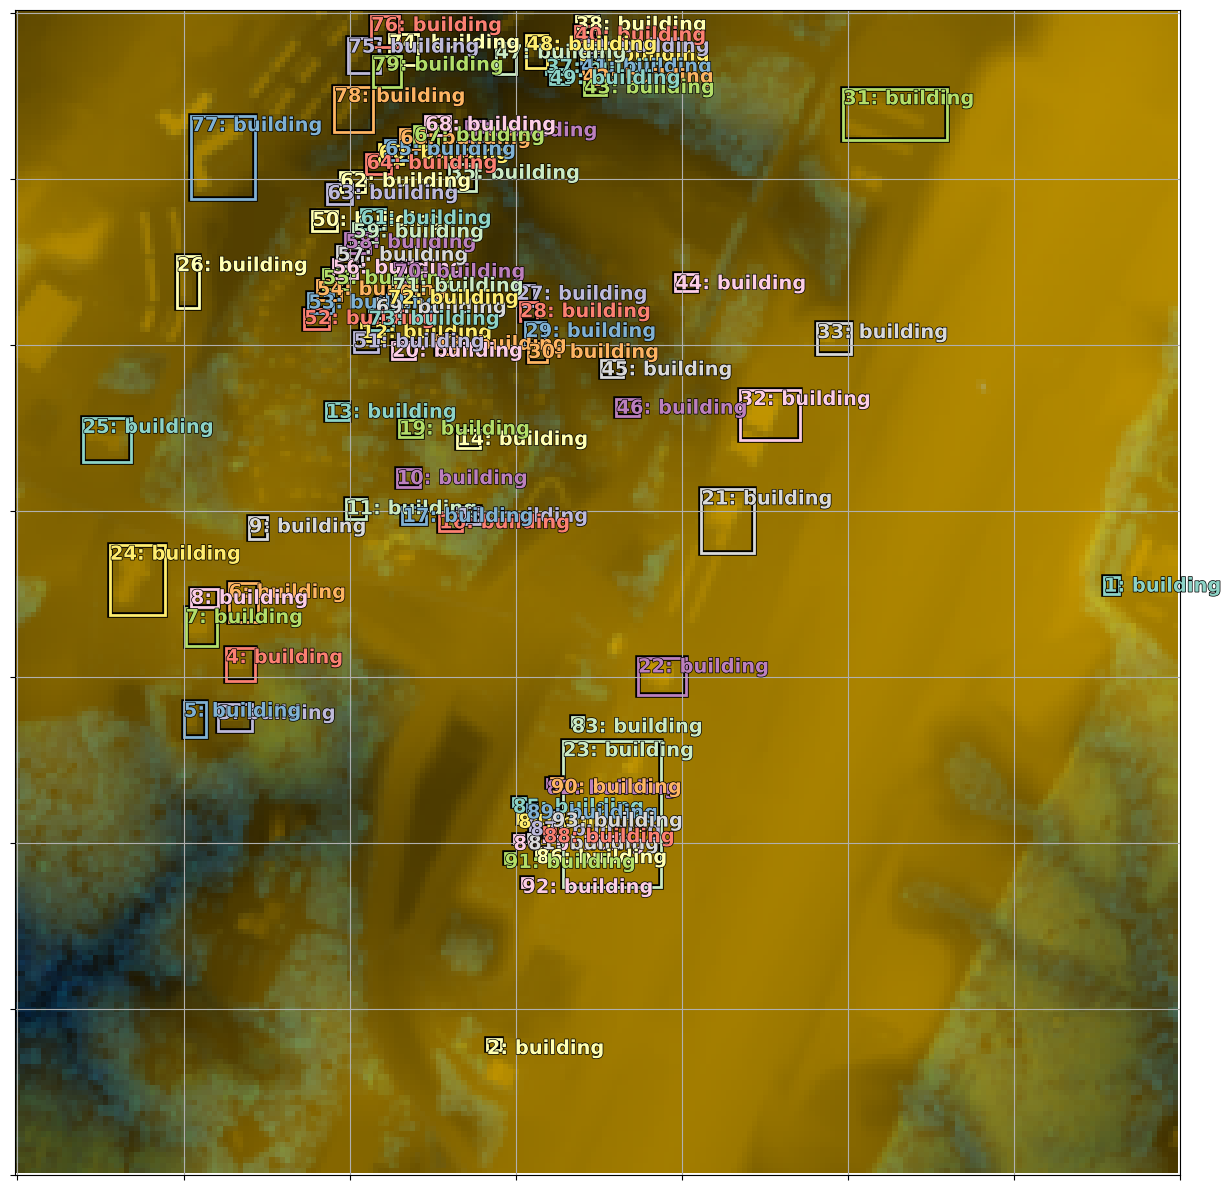

In [ ]:
## Bounding Box after dataloader should Rescale
fig, axes = plt.subplots(1,1,figsize=(16, 12))
i,ax = 0,axes
show_ground_truth(ax, x[i].cpu(), ((y[0][i]+1)/2*224).cpu(), y[1][i].cpu())
plt.tight_layout()

# Map to Ground-Truth and Loss function

In [ ]:
def get_y(bbox,clas):
    """
    Remove the zero batching from a batch
    
    Because the number of object in each image are different so
    we need to zero padding for batching 
    """
    bbox = bbox.view(-1,4)
    clas = clas.view(-1,1)
    bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
    return TensorBase(bbox)[bb_keep],TensorBase(clas)[bb_keep]

In [ ]:
one_batch[2][idx]

TensorMultiCategory([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [ ]:
one_batch[2][idx]

TensorMultiCategory([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [ ]:
get_y(one_batch[1][idx], one_batch[2][idx])

(TensorBBox([[-0.0295,  0.8689, -0.0095,  0.8869],
             [ 0.7659, -0.1926,  0.7759, -0.1766],
             [ 0.1896, -0.6548,  0.2276, -0.6048],
             [ 0.0935, -0.6418,  0.1416, -0.6008],
             [ 0.1856, -0.7139,  0.2376, -0.6838],
             [-0.0185, -0.6368,  0.0395, -0.5958],
             [ 0.0245, -0.7109,  0.0805, -0.6658],
             [-0.0085, -0.7019,  0.0145, -0.6638],
             [-0.1316, -0.6018, -0.1036, -0.5788],
             [-0.2146, -0.3477, -0.1936, -0.3167],
             [-0.1626, -0.4347, -0.1386, -0.4097],
             [-0.4657, -0.4087, -0.4447, -0.3777],
             [-0.3287, -0.4697, -0.3077, -0.4387],
             [-0.2816, -0.2436, -0.2606, -0.2126],
             [-0.1496, -0.2436, -0.1286, -0.2126],
             [-0.1386, -0.2746, -0.1176, -0.2436],
             [-0.1496, -0.3377, -0.1286, -0.3057],
             [-0.4457, -0.2806, -0.4217, -0.2566],
             [-0.2996, -0.3437, -0.2786, -0.3127],
             [-0.4337, -0.3557,

In [ ]:
def hw2corners(ctr, hw): 
    # Function to convert BB format: (centers and dims) -> corners
    return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

In [ ]:
def actn_to_bb(actn, anchors):
    actn_bbs = torch.tanh(actn)
    actn_centers = (actn_bbs[:,:2]/2 * grid_sizes) + anchors[:,:2]
    actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:]
    return hw2corners(actn_centers, actn_hw)

In [ ]:
def one_hot_embedding(labels, num_classes):
    return torch.eye(num_classes)[labels].cuda()

In [ ]:
def intersect(box_a, box_b):
    """
    Intersect area between to bounding boxes
    """
    max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
    min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

In [ ]:
def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

In [ ]:
def jaccard(box_a, box_b):
    """
    Jaccard or Intersection over Union
    """
    inter = intersect(box_a, box_b)
    union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
    return inter / union

In [ ]:
def map_to_ground_truth(overlaps):
    prior_overlap, prior_idx = overlaps.max(1) # 3
    gt_overlap, gt_idx = overlaps.max(0) # 16
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap,gt_idx

In [ ]:
def ssd_1_loss(b_c,b_bb,bbox,clas):
    bbox,clas = get_y(bbox,clas)
    bbox = (bbox+1)/2
    a_ic = actn_to_bb(b_bb, anchors)
    overlaps = jaccard(bbox.data, anchor_cnr.data)
    gt_overlap,gt_idx = map_to_ground_truth(overlaps)
    gt_clas = clas[gt_idx]
    pos = gt_overlap > 0.4
    pos_idx = torch.nonzero(pos)[:,0]
    gt_clas[~pos] = 0  # Assign the background to idx 0
    gt_bbox = bbox[gt_idx]
    loc_loss = ((TensorBase(a_ic[TensorBase(pos_idx)]) - TensorBase(gt_bbox[TensorBase(pos_idx)])).abs()).mean()
    clas_loss  = loss_f(b_c, gt_clas)
    return loc_loss, clas_loss

In [ ]:
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:]).cuda()

## Showing Map To Ground Truth

In [ ]:
idx = 0
bbox = one_batch[1][idx].cuda()
clas = one_batch[2][idx].cuda()

In [ ]:
bbox,clas = get_y(bbox,clas)
bbox = (bbox+1)/2
# a_ic = actn_to_bb(b_bb, anchors)
overlaps = jaccard(bbox.data, anchor_cnr.data)
gt_overlap,gt_idx = map_to_ground_truth(overlaps)
gt_clas = clas[gt_idx]
pos = gt_overlap > 0.4
pos_idx = torch.nonzero(pos)[:,0]
gt_clas[~pos] = 0  # Assign the background to idx 0
gt_bbox = bbox[gt_idx]

In [ ]:
ima = one_batch[0][idx].permute(2,1,0).cpu()

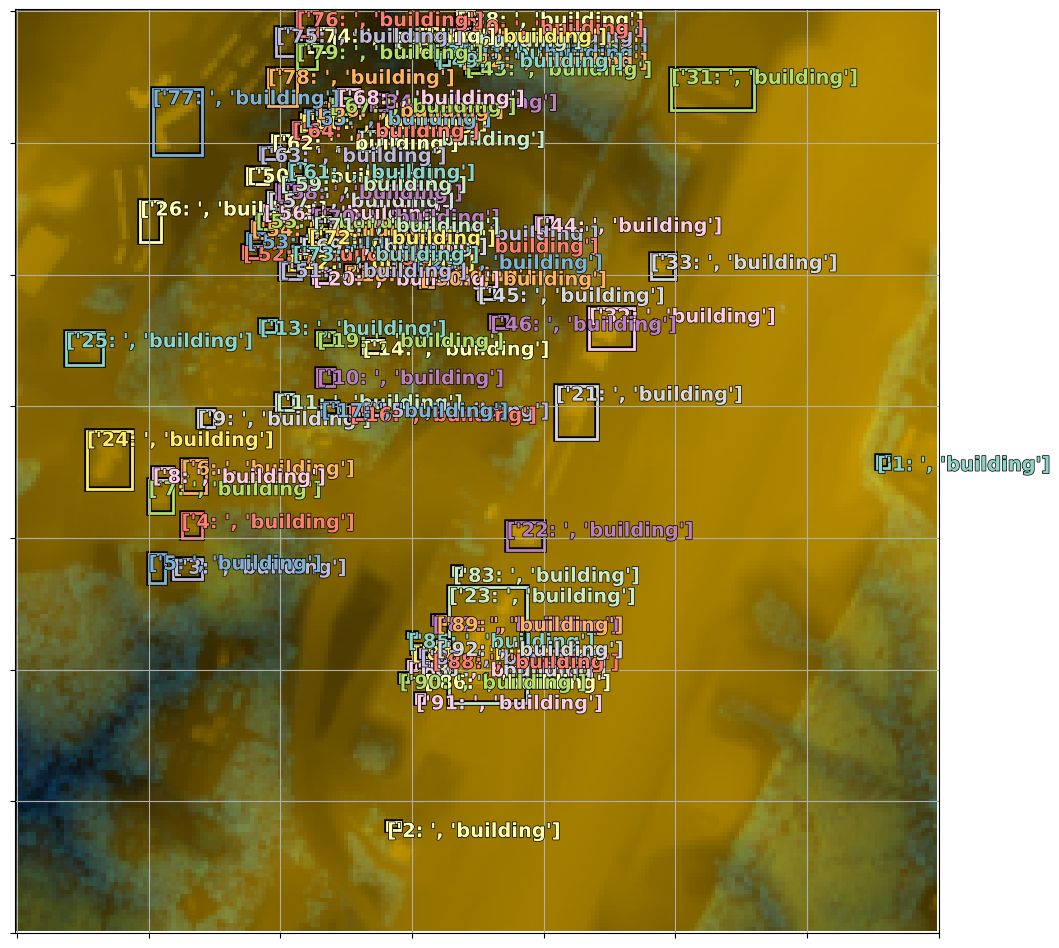

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
torch_gt(ax, ima, bbox, clas)

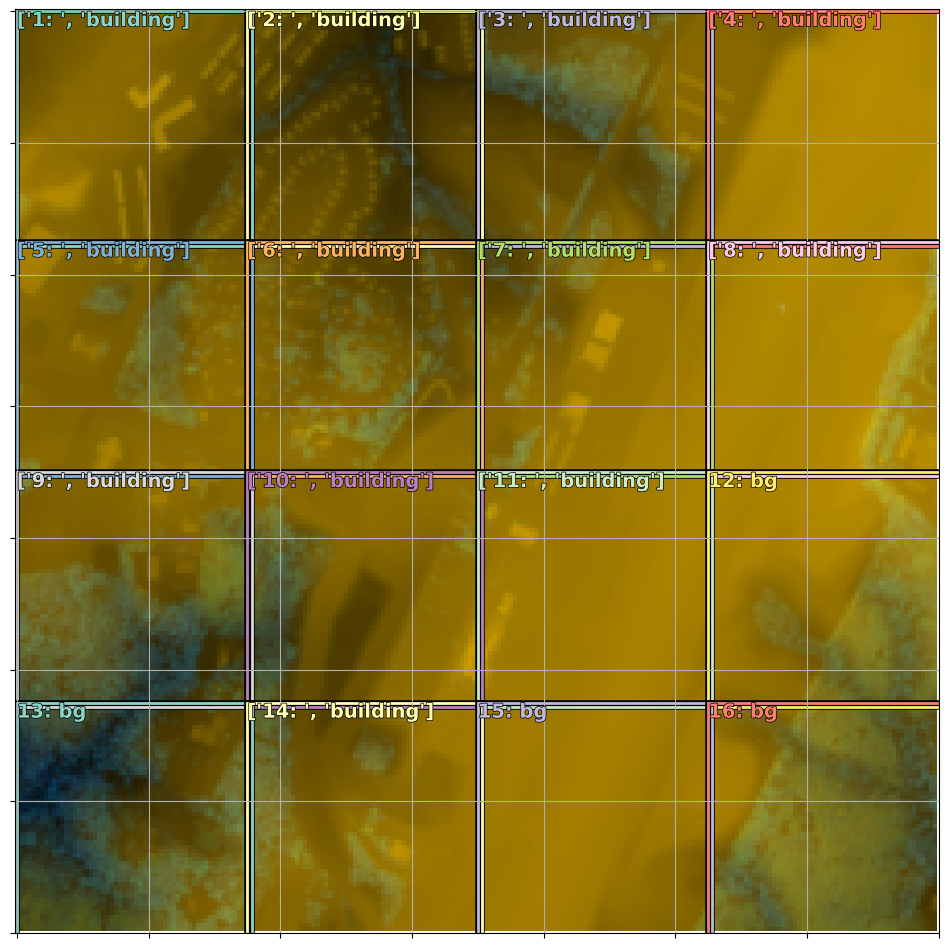

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
torch_gt(ax, ima, anchor_cnr, gt_clas)

In [ ]:
sz = 224

# Classificaton Loss: Binary Cross Entropy and why Focal Loss

In [ ]:
class BCE_Loss(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

    def forward(self, pred, targ):
        t = one_hot_embedding(targ.squeeze(), self.num_classes)
        t = t[:,1:] # Start from 1 to exclude the Background
        x = pred[:,1:]
        w = self.get_weight(x,t)
        return F.binary_cross_entropy_with_logits(x, t, w.detach(), reduction='sum')/self.num_classes
    
    def get_weight(self,x,t): return None

In [ ]:
class FocalLoss(BCE_Loss):
    def get_weight(self,x,t):
        alpha,gamma = 0.25,1
        p = x.sigmoid()
        pt = p*t + (1-p)*(1-t)
        w = alpha*t + (1-alpha)*(1-t)
        return w * (1-pt).pow(gamma)

In [ ]:
def ssd_loss(pred, bbox, clas):
    lcs, lls = 0., 0.
    W = 30
    for b_c, b_bb, bbox, clas in zip(*pred, bbox, clas):
        loc_loss, clas_loss = ssd_1_loss(b_c, b_bb, bbox, clas)
        lls += loc_loss
        lcs += clas_loss
    return lls + lcs

In [ ]:
loss_f = FocalLoss(len(dls.vocab))

# Training Simple Model

In [ ]:
model = nn.Sequential(body, head_reg4)
learner = Learner(dls, model, loss_func=BCE_Loss)

In [ ]:
learner.fit_one_cycle(5, 1e-5) 

epoch,train_loss,valid_loss,time


TypeError: BCE_Loss.__init__() takes 2 positional arguments but 4 were given